In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import datetime
%matplotlib inline
pd.set_option('display.max_columns', None)
np.random.seed(1)

In [24]:
traindata = pd.read_csv('DataQuest/dataquesttrain.csv')
testdata = pd.read_csv('DataQuest/dataquesttest.csv')

In [25]:
traindata.head()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
0,VIC20120001987267,22:23:19,07-11-2012,Subhash Nagar,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0
1,VIC20110002147887,20:23:09,02-11-2011,Coro Nation,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0
2,VIC20090001391483,20:37:15,25-07-2009,Kewal Vihar,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0
3,VIC20120000900722,15:20:22,19-05-2012,I S B T,Raipur,2 Wheeler accidents,8,4,CUR,HIW,HIL,0
4,VIC20100001241285,16:22:17,12-06-2010,Sahaspur Ambu,Sahaspur,2 Wheeler accidents,1,26,CUR,HIW,AGL,0


In [26]:
testdata.head()

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area
0,VIC20100001032706,15:46:12,19-05-2010,Chc Sahaspur,Sahaspur,MVC - Pedestrian (Run Over/Hit & Run),23,27,INT,LOC,MAR
1,VIC20120000441519,16:55:28,18-03-2012,Doiwala Ambulance,Doiwala,Multiple Vehicular Incident,5,21,CUR,HIW,AGL
2,VIC20130000014119,18:49:35,04-01-2013,Race Course Chowk,Raipur,Multiple Vehicular Incident,3,1,CUR,HIW,AGL
3,VIC20140000614145,16:22:55,31-05-2014,Selaqui,Sahaspur,Multiple Vehicular Incident,18,14,UNK,LOC,AGL
4,VIC20090002298916,15:35:15,08-12-2009,"Ambari Mode,Dakpather",Vikasnagar,2 Wheeler accidents,6,10,INT,LOC,MAR


In [27]:
traindata.dtypes

victim_id                     object
incident_time                 object
incident_date                 object
incident_location             object
incident_tehsil               object
cause_of_emergency            object
base_to_scene_distance         int64
scene_to_hospital_distance     int64
roadway_feature               object
road_type                     object
surrounding_area              object
criticality                    int64
dtype: object

In [28]:
traindata['hour'] = traindata['incident_time'].str[:2].astype(int)
traindata['min'] = traindata['incident_time'].str[3:5].astype(int)
traindata['sec'] = traindata['incident_time'].str[6:].astype(int)

testdata['hour'] = testdata['incident_time'].str[:2].astype(int)
testdata['min'] = testdata['incident_time'].str[3:5].astype(int)
testdata['sec'] = testdata['incident_time'].str[6:].astype(int)

In [29]:
traindata['date'] = traindata['incident_date'].str[:2].astype(int)
traindata['month'] = traindata['incident_date'].str[3:5].astype(int)
traindata['year'] = traindata['incident_date'].str[6:].astype(int)

testdata['date'] = testdata['incident_date'].str[:2].astype(int)
testdata['month'] = testdata['incident_date'].str[3:5].astype(int)
testdata['year'] = testdata['incident_date'].str[6:].astype(int)

In [30]:
traindata['Date'] = pd.to_datetime((traindata.year*10000 + traindata.month*100 + traindata.date).apply(str),format='%Y%m%d')
testdata['Date'] = pd.to_datetime((testdata.year*10000 + testdata.month*100 + testdata.date).apply(str),format='%Y%m%d')

year
2009    1829
2010    1828
2011    1915
2012    2045
2013    2165
2014    1995
dtype: int64


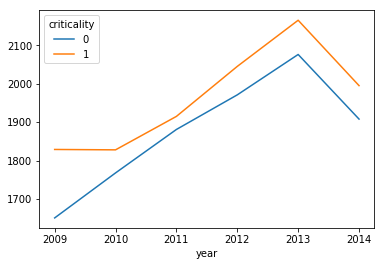

In [48]:
crosstable = pd.crosstab(traindata['year'], traindata['criticality'])
crosstable.plot(kind='line', stacked = True)
print(crosstable[0] + crosstable[1])

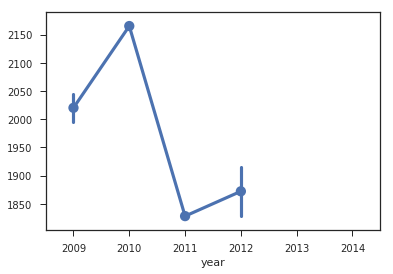

In [58]:
sns.pointplot(traindata['year'], crosstable[0] + crosstable[1])

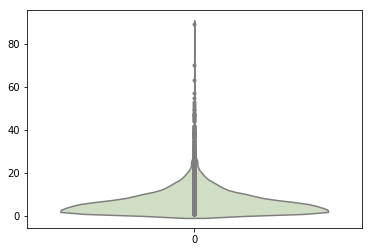

In [52]:
pal = sns.cubehelix_palette(8, rot=-.5, dark=.3)

# Show each distribution with both violins and points
sns.violinplot(data=traindata['base_to_scene_distance'], palette=pal, inner="points")

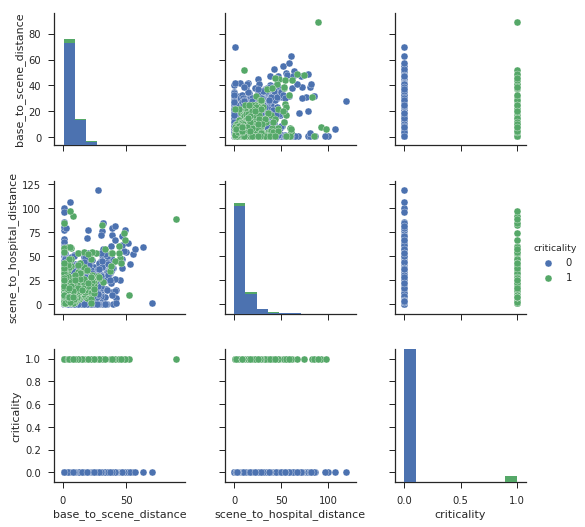

In [54]:
sns.set(style="ticks")

sns.pairplot(traindata[['base_to_scene_distance', 'scene_to_hospital_distance', 'criticality']] , hue="criticality")

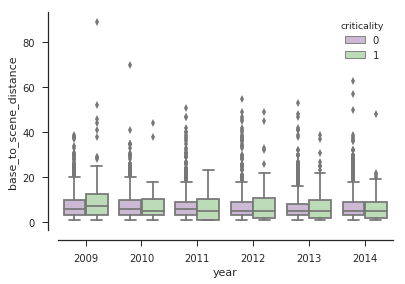

In [57]:
sns.set(style="ticks")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x = "year", y = "base_to_scene_distance", hue = "criticality", data = traindata, palette = "PRGn")
sns.despine(offset=10)

In [193]:
sumtrain['No. of Accidents'] = sumtrain['victim_id']

In [192]:
sumtrain = traindata.groupby(['season'], as_index = False).count()

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

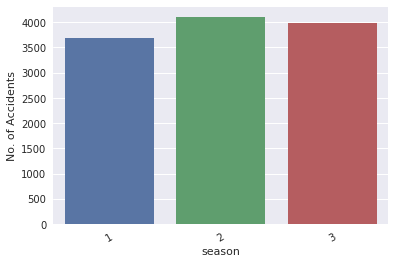

In [194]:
sns.barplot(x = 'season', y = 'No. of Accidents', data = sumtrain)
plt.xticks(rotation = 30)

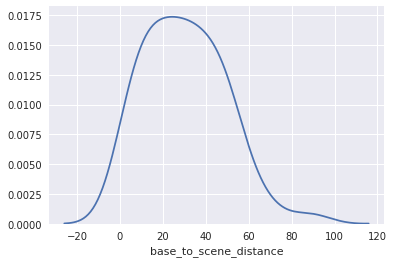

In [149]:
sns.distplot(sumtrain['base_to_scene_distance'], hist=False)

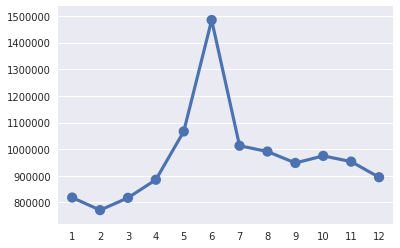

In [140]:
sns.pointplot(x = tourism_month, y = tourism)

In [118]:
X = traindata['base_to_scene_distance']
Y = traindata['criticality']

In [119]:
from sklearn import tree 
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X.reshape(-1,1) ,Y)

/home/rohit/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
export_graphviz(clf, out_file='decision_tree_bts.dot', class_names='criticality')

In [125]:
import pydot

(graph,) = pydot.graph_from_dot_file('decision_tree_bts.dot')
graph.write_png('somefile.png')

In [126]:
from sklearn.tree import export_graphviz

In [128]:
traindata['season'] = traindata['month']

In [129]:
traindata['season']=traindata['season'].replace([11,12,1,2], 1)
traindata['season']=traindata['season'].replace([3,4,5,6], 2)
traindata['season']=traindata['season'].replace([7,8,9,10], 3)

In [139]:
tourism = [818288, 771068, 817206, 885159, 1066441, 1484762, 1012832, 991075, 948161, 974729, 953231, 894505]
tourism_month = [1,2,3,4,5,6,7,8,9,10,11,12]